replicating local resources


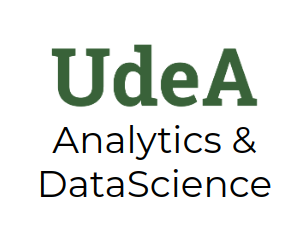

In [94]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image
Image("local/imgs/udea-datascience.png")

# **MODELO MACHINE LEARNING PARA LA PREDICCIÓN**
# **ANTICIPADA DE INSOLVENCIA EN EMPRESAS**


> **Laura Sofía Caita Giraldo**
>>Código: 1019138613
>>> Universidad de Antioquia



 ETAPA 4: MODELOS 

In [95]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [96]:
datos2 = pd.read_csv("/content/Datos_Escalados_Estandar.csv")
datos2

,NIT,Razón social de la sociedad,CIIU,Tipo societario,Departamento de la dirección del domicilio,Ingresos de actividades ordinarias,Costo de ventas,Ganancia bruta,Otros ingresos,Gastos de ventas,...,Prueba ácida,Liquidez general,Leverage,Endeudamiento sobre activos,Concentración endeudamiento corto plazo,Concentración endeudamiento largo plazo,Rotación de cartera,Rotación proveedores,Proceso,Insolvencia
0,-0.833994,1.185588,0.229951,-1.242511,0.531137,-0.279701,-0.294426,-0.191401,-0.180755,-0.276731,...,-0.248074,-0.041840,0.083491,0.934552,0.699825,-0.699825,-0.037533,-0.066377,0.317088,-0.338335
1,-0.833994,1.185588,0.229951,-1.242511,0.531137,-0.286251,-0.294647,-0.204859,-0.173184,-0.271150,...,-0.283733,-0.042111,0.075945,0.883741,0.833093,-0.833093,-0.036838,0.107875,0.317088,-0.338335
2,-1.618099,-1.282295,0.817188,-1.242511,-0.483925,-0.343213,-0.372605,-0.219636,-0.122130,-0.367916,...,-0.017352,-0.034854,0.036793,0.473320,-1.179673,1.179673,-0.045191,-0.198187,0.317088,-0.338335
3,-1.618099,-1.282295,0.817188,-1.242511,-0.483925,-0.320812,-0.345579,-0.208942,-0.126925,-0.367916,...,-0.016868,-0.039314,0.020944,0.172742,-0.689778,0.689778,-0.061481,-0.193103,0.317088,-0.338335
4,-0.834578,-1.177410,-0.118042,-1.242511,-0.483925,0.269145,0.433208,-0.017373,0.013132,0.677940,...,-0.178266,-0.042549,0.007936,-0.203435,-0.550484,0.550484,-0.118837,-0.251733,0.317088,-0.338335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1.036554,1.679165,1.078182,0.853193,0.531137,-0.175651,-0.168123,-0.142755,-0.163846,-0.173657,...,0.407062,-0.047585,-0.018220,-1.987678,1.283369,-1.283369,-0.110166,-0.159047,0.317088,-0.338335
1028,1.036554,1.679165,1.078182,0.853193,0.531137,-0.254542,-0.269937,-0.171502,-0.167588,-0.230655,...,0.185302,-0.045876,-0.014615,-1.570734,0.240766,-0.240766,-0.090572,0.026138,0.317088,-0.338335
1029,1.037645,-1.047846,1.208679,-1.242511,2.155235,-0.414168,-0.462203,-0.248148,-0.180755,-0.367916,...,-0.428275,0.043836,-0.017482,-1.894118,1.180999,-1.180999,-0.134646,7.743451,-1.939703,2.955647
1030,1.037645,-1.047846,1.208679,-1.242511,2.155235,-0.414361,-0.461952,-0.248891,-0.180755,-0.367916,...,-0.419546,0.046135,-0.019730,-2.195090,0.179692,-0.179692,-0.139082,2.370858,0.317088,-0.338335


In [97]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Datos3 = datos2.apply(encoder.fit_transform)
Datos3

,NIT,Razón social de la sociedad,CIIU,Tipo societario,Departamento de la dirección del domicilio,Ingresos de actividades ordinarias,Costo de ventas,Ganancia bruta,Otros ingresos,Gastos de ventas,...,Prueba ácida,Liquidez general,Leverage,Endeudamiento sobre activos,Concentración endeudamiento corto plazo,Concentración endeudamiento largo plazo,Rotación de cartera,Rotación proveedores,Proceso,Insolvencia
0,130,449,98,0,7,517,513,480,0,309,...,303,507,927,896,717,297,818,779,2,0
1,130,449,98,0,7,504,511,404,162,317,...,197,486,911,880,763,251,821,924,2,0
2,50,69,125,0,2,376,384,314,506,0,...,754,822,770,739,157,857,787,274,2,0
3,50,69,125,0,2,434,441,375,488,0,...,755,660,631,600,279,735,695,301,2,0
4,121,83,82,0,2,877,852,823,684,645,...,480,441,449,418,326,688,170,70,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,530,526,137,7,7,665,635,625,259,414,...,962,23,44,13,917,97,248,468,2,0
1028,530,526,137,7,7,566,544,562,221,371,...,905,102,93,62,570,444,459,881,2,0
1029,531,101,143,0,15,15,10,35,0,0,...,4,1018,53,22,878,136,40,1022,1,1
1030,531,101,143,0,15,9,15,22,0,0,...,7,1020,39,8,544,470,15,1012,2,0


In [98]:
Datos3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 50 columns):
 #   Column                                                                Non-Null Count  Dtype
---  ------                                                                --------------  -----
 0   NIT                                                                   1032 non-null   int64
 1   Razón social de la sociedad                                           1032 non-null   int64
 2   CIIU                                                                  1032 non-null   int64
 3   Tipo societario                                                       1032 non-null   int64
 4   Departamento de la dirección del domicilio                            1032 non-null   int64
 5   Ingresos de actividades ordinarias                                    1032 non-null   int64
 6   Costo de ventas                                                       1032 non-null   int64
 7   Ganancia bruta 

In [99]:
#split 80-20
from sklearn.model_selection import train_test_split
y = Datos3["Insolvencia"].astype(float)
X = Datos3.drop("Insolvencia", axis=1).astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Para que corra la red neuronal fue necesario cambiar el tipo de dato a "float". Asimismo, como es un Dataset desbalanceado se utilizó el parámetro "stratify"

In [100]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [101]:
skf = StratifiedKFold(n_splits=7, random_state=None, shuffle=False)

for train_index, test_index in skf.split(X, y):
  print("Train:", train_index, "Test:", test_index)
  original_X_train, original_X_test = X.iloc[train_index], X.iloc[test_index]
  original_y_train, original_y_test = y.iloc[train_index], y.iloc[test_index]

#pasarlo a arrays
original_X_train = original_X_train.values
original_X_test = original_X_test.values
original_y_train = original_y_train.values
original_y_test = original_y_test.values

# distrbución del test y train
train_unique_label, train_counts_label = np.unique(original_y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_y_train))
print(test_counts_label/ len(original_y_test))

Train: [ 106  119  130  131  137  138  139  144  145  155  158  159  160  161
  162  163  164  165  166  167  168  169  170  171  172  173  174  175
  176  177  178  179  180  181  182  183  184  185  186  187  188  189
  190  191  192  193  194  195  196  197  198  199  200  201  202  203
  204  205  206  207  208  209  210  211  212  213  214  215  216  217
  218  219  220  221  222  223  224  225  226  227  228  229  230  231
  232  233  234  235  236  237  238  239  240  241  242  243  244  245
  246  247  248  249  250  251  252  253  254  255  256  257  258  259
  260  261  262  263  264  265  266  267  268  269  270  271  272  273
  274  275  276  277  278  279  280  281  282  283  284  285  286  287
  288  289  290  291  292  293  294  295  296  297  298  299  300  301
  302  303  304  305  306  307  308  309  310  311  312  313  314  315
  316  317  318  319  320  321  322  323  324  325  326  327  328  329
  330  331  332  333  334  335  336  337  338  339  340  341  342  343

Se observa como quedan las distribuciones de cada clase

 **ETAPA 4.1: Modelos con hiperparámetros preestablecidos**  

In [102]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [103]:
#cross validation
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "tiene un", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression tiene un 88.0 % accuracy score
Classifiers:  KNeighborsClassifier tiene un 89.0 % accuracy score
Classifiers:  DecisionTreeClassifier tiene un 100.0 % accuracy score


Como se puede observar, los resultados de los tres modelos tan bastante altos lo cual hace sospechar que puede haber un overfitting.

 **ETAPA 4.2: Modelos con los mejores hiperparámetros** 

Ahora se van a probar los mismos modelos, pero esta vez con GridSearchCV para ver cuales son los mejores hiperparámetros

In [104]:
# GridSearchCV para ver cuales son los mejores parámetros
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_


In [105]:
#Con overfitting y mejores parámetros 

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')


tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  88.48%
Knears Neighbors Cross Validation Score 89.58%
DecisionTree Classifier Cross Validation Score 100.0%


Si bien mejoró un poco el score, la diferencia no es muy grande con respecto a como estaba con los parámetros preestablecidos.

 **ETAPA 4.3: Oversampling** 

In [106]:
sss = StratifiedKFold(n_splits=5, random_state = 42, shuffle=True)

undersample_X = Datos3.drop("Insolvencia", axis=1)
undersample_y = Datos3['Insolvencia']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Técnica NearMiss para ver la distribución
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

# Cross Validating con undersample 

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_X_train[test], original_y_train[test]))
    undersample_precision.append(precision_score(original_y_train[test], undersample_prediction))
    undersample_recall.append(recall_score(original_y_train[test], undersample_prediction))
    undersample_f1.append(f1_score(original_y_train[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_y_train[test], undersample_prediction))

Train: [   0    1    3    4    6    7    8   10   11   13   14   15   16   17
   18   20   22   23   24   25   26   27   28   29   30   31   32   33
   35   36   37   39   40   42   43   44   46   47   49   51   53   55
   56   57   58   59   60   61   62   63   64   65   66   68   69   70
   72   73   74   75   76   77   78   79   80   82   83   84   85   86
   87   88   89   90   92   93   94   95   96   98   99  100  101  102
  103  105  106  107  108  109  111  113  114  115  116  117  118  119
  120  121  122  123  125  126  127  129  130  131  132  133  134  135
  136  137  138  139  140  141  142  143  144  145  146  147  148  149
  150  151  153  154  156  157  158  160  161  162  163  164  165  166
  167  168  169  170  173  174  175  176  177  178  179  180  181  182
  183  185  186  187  188  189  190  191  192  195  196  198  199  200
  203  204  206  207  208  209  210  211  212  214  217  218  219  220
  222  223  224  225  226  227  231  232  233  234  235  236  237  239

In [107]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
#para crear los gráficos
def plot_learning_curve(estimator1, estimator2, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, (ax1, ax2, ax4) = plt.subplots(3,1, figsize=(20,20), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

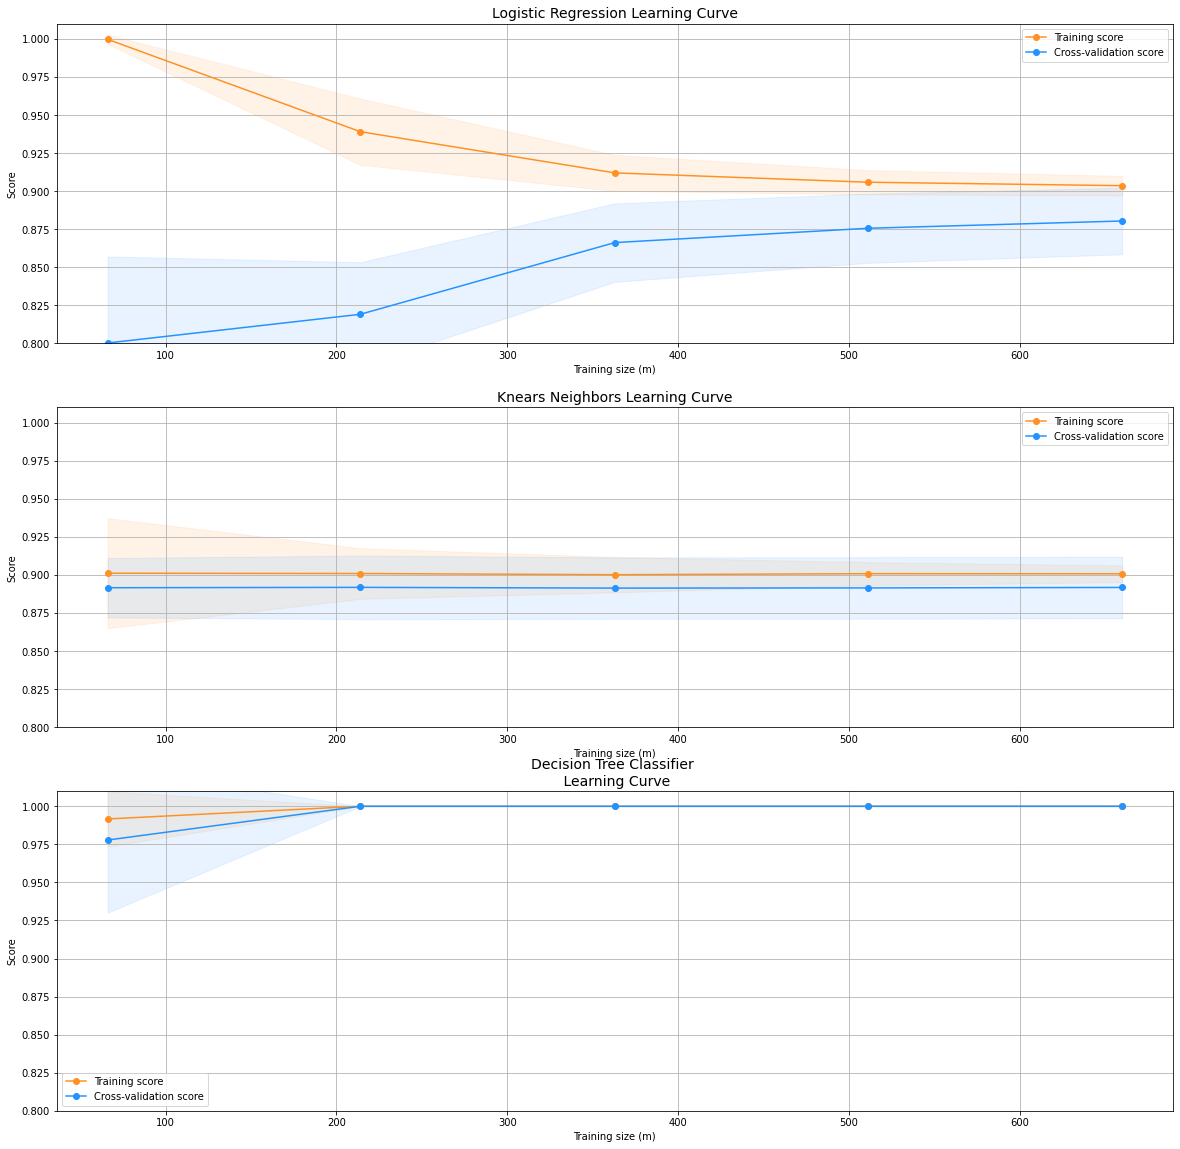

In [108]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, tree_clf, X_train, y_train, (0.8, 1.01), cv=cv, n_jobs=3)

Regresion logistica: curva training score es descendente a medida que aumenta training size. El espectro es amplio. Cross validation es ascendente a medida que aumenta training size. Las dos lineas se intersectarian en algun punto.

Vecinos mas cercanos: las lineas training score y cross validation son paralelas para cualquier valor de training size. el espectro de ambas lineas es mas estracho que en regresion logistica.

Arbol de decisiones: aunque inicialmente para valores bajos de training size hay una diferencia, las dos lineas convergen y llegan a un mismo valoren aproximadamente 210 de training size, luego de lo cual toman el mismo score para cualquier training size mayor a 210


In [109]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Dataframe con los clasificadores.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)


tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [110]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.628314785373609
KNears Neighbors:  0.5045310015898251
Decision Tree Classifier:  1.0


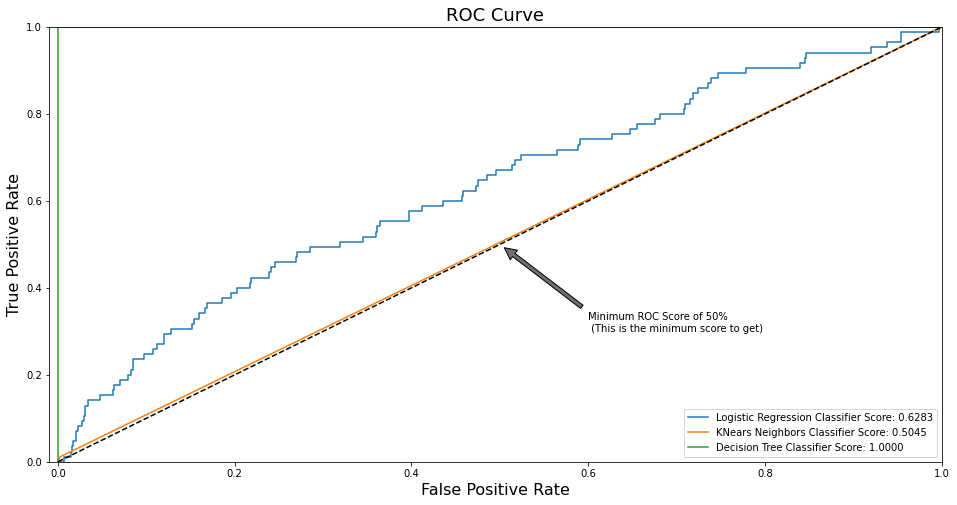

In [111]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr)
plt.show()

La regresión logística y KNN bajaron su score, pero es interesante ver como el árbol de decisión se mantiene.


SMOTE con regresión logística

In [112]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_X_train), len(original_y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_X_test), len(original_y_test)))


accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []


log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_X_train, original_y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_X_train[train], original_y_train[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_X_train[test])
    
    accuracy_lst.append(pipeline.score(original_X_train[test], original_y_train[test]))
    precision_lst.append(precision_score(original_y_train[test], prediction))
    recall_lst.append(recall_score(original_y_train[test], prediction))
    f1_lst.append(f1_score(original_y_train[test], prediction))
    auc_lst.append(roc_auc_score(original_y_train[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 885 | Length of y (train): 885
Length of X (test): 147 | Length of y (test): 147
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.6858757062146892
precision: 0.16310800691030686
recall: 0.4947368421052632
f1: 0.2436941245408671
---------------------------------------------------------------------------------------------------------------------------------------


Cuando se aplica la técnica SMOTE los score disminuyen considerablemente, en especial con precision y F1. 

In [113]:
labels = ['0', '1']
smote_prediction = best_est.predict(original_X_test)
print(classification_report(original_y_test, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       132
           1       0.14      0.33      0.19        15

    accuracy                           0.71       147
   macro avg       0.52      0.55      0.51       147
weighted avg       0.83      0.71      0.76       147



Acá se pueden observar los resultados con mayor claridad

In [114]:
y_score = best_est.decision_function(original_X_test)

In [115]:
undersample_y_score = log_reg.decision_function(original_X_test)

In [116]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_y_test, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.11


In [117]:
average_precision = average_precision_score(original_y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.14


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.14')

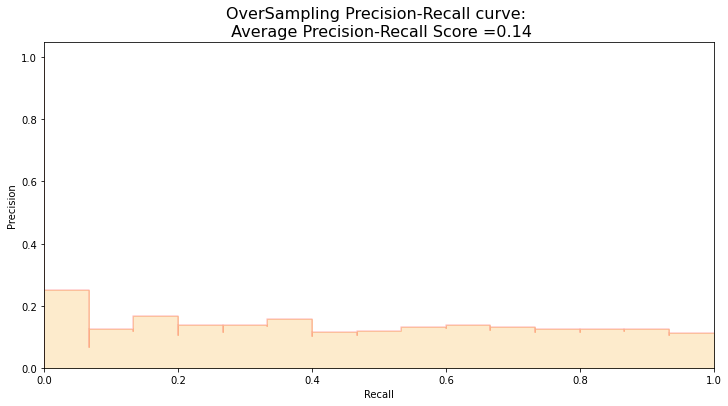

In [118]:
from sklearn.metrics import precision_recall_curve

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_y_test, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

Para mostrar de forma más gráfica, se observa que la media de "precision" está por 0.13

In [119]:
sm = SMOTE(sampling_strategy=0.5,random_state=10)

Xsm_train, ysm_train = sm.fit_resample(original_X_train, original_y_train)

In [120]:

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :0.07927346229553223 sec


SMOTE KNN

In [121]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_X_train), len(original_y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_X_test), len(original_y_test)))


accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []


log_KNN_sm = KNeighborsClassifier()




log_KNN_sm = RandomizedSearchCV(KNeighborsClassifier(), knears_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
knears_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_X_train, original_y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), log_KNN_sm) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_X_train[train], original_y_train[train])
    best_est = log_KNN_sm.best_estimator_
    prediction = best_est.predict(original_X_train[test])
    
    accuracy_lst.append(pipeline.score(original_X_train[test], original_y_train[test]))
    precision_lst.append(precision_score(original_y_train[test], prediction))
    recall_lst.append(recall_score(original_y_train[test], prediction))
    f1_lst.append(f1_score(original_y_train[test], prediction))
    auc_lst.append(roc_auc_score(original_y_train[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 885 | Length of y (train): 885
Length of X (test): 147 | Length of y (test): 147
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.7570621468926554
precision: 0.14702756892230576
recall: 0.2976608187134503
f1: 0.18922137578011008
---------------------------------------------------------------------------------------------------------------------------------------


SMOTE DECISION TREE

In [122]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(original_X_train), len(original_y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_X_test), len(original_y_test)))


accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []


log_DTC_sm = DecisionTreeClassifier()

log_DTC_sm = RandomizedSearchCV(DecisionTreeClassifier(), tree_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
tree_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_X_train, original_y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), log_DTC_sm) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_X_train[train], original_y_train[train])
    best_est = log_DTC_sm.best_estimator_
    prediction = best_est.predict(original_X_train[test])
    
    accuracy_lst.append(pipeline.score(original_X_train[test], original_y_train[test]))
    precision_lst.append(precision_score(original_y_train[test], prediction))
    recall_lst.append(recall_score(original_y_train[test], prediction))
    f1_lst.append(f1_score(original_y_train[test], prediction))
    auc_lst.append(roc_auc_score(original_y_train[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 885 | Length of y (train): 885
Length of X (test): 147 | Length of y (test): 147
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9977401129943504
precision: 0.99
recall: 0.9888888888888889
f1: 0.9891575091575092
---------------------------------------------------------------------------------------------------------------------------------------


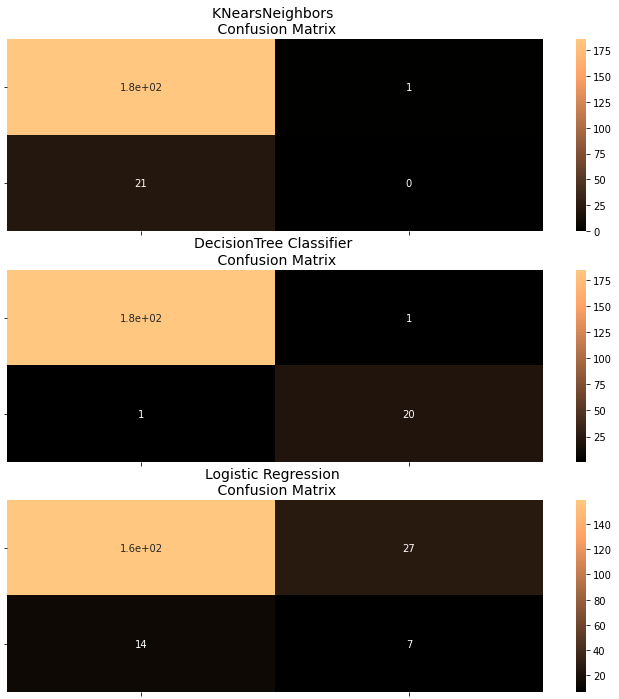

In [123]:
from sklearn.metrics import confusion_matrix


# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)
y_pred_log_reg = log_reg_sm.predict(X_test)

kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
tree_cf = confusion_matrix(y_test, y_pred_tree)
log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)

fig, ax = plt.subplots(3, 1,figsize=(12,12))

sns.heatmap(kneighbors_cf, ax=ax[0], annot=True, cmap=plt.cm.copper)
ax[0].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1], annot=True, cmap=plt.cm.copper)
ax[1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(log_reg_cf, ax=ax[2], annot=True, cmap=plt.cm.copper)
ax[2].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[2].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

Con el KNN llama la tención que las clases no están balanceadas.
Y del árbol de decisión cómo sigue dando un muy buen resultado.

In [125]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_X_test)
oversample_score = accuracy_score(original_y_test, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Technique,Score
0,Random UnderSampling,0.801932
1,Oversampling (SMOTE),1.000000


Con estas técnicas puede verse que el Accurancy a veces puede ser engañoso, especialmente en Datasets con bases desbalanceadas.

 ETAPA 4: MODELO 3 REDES NEURONALES

In [162]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
import keras.optimizers
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [163]:
undersample_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 49)                2450      
                                                                 
 dense_19 (Dense)            (None, 32)                1600      
                                                                 
 dense_20 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,116
Trainable params: 4,116
Non-trainable params: 0
_________________________________________________________________


In [164]:
from tensorflow.keras.optimizers import Adam
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [165]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=10, shuffle=True, verbose=2)

Epoch 1/10
27/27 - 1s - loss: 28.9802 - accuracy: 0.8424 - val_loss: 12.2710 - val_accuracy: 0.8061 - 626ms/epoch - 23ms/step
Epoch 2/10
27/27 - 0s - loss: 10.1531 - accuracy: 0.8348 - val_loss: 9.1677 - val_accuracy: 0.8485 - 84ms/epoch - 3ms/step
Epoch 3/10
27/27 - 0s - loss: 6.5539 - accuracy: 0.8591 - val_loss: 8.6601 - val_accuracy: 0.8000 - 91ms/epoch - 3ms/step
Epoch 4/10
27/27 - 0s - loss: 5.1911 - accuracy: 0.8606 - val_loss: 9.8791 - val_accuracy: 0.7030 - 140ms/epoch - 5ms/step
Epoch 5/10
27/27 - 0s - loss: 4.1876 - accuracy: 0.8364 - val_loss: 7.2865 - val_accuracy: 0.8788 - 72ms/epoch - 3ms/step
Epoch 6/10
27/27 - 0s - loss: 4.4999 - accuracy: 0.8606 - val_loss: 7.0838 - val_accuracy: 0.7818 - 83ms/epoch - 3ms/step
Epoch 7/10
27/27 - 0s - loss: 3.8181 - accuracy: 0.8591 - val_loss: 7.0354 - val_accuracy: 0.8000 - 83ms/epoch - 3ms/step
Epoch 8/10
27/27 - 0s - loss: 2.9998 - accuracy: 0.8561 - val_loss: 6.2812 - val_accuracy: 0.8242 - 97ms/epoch - 4ms/step
Epoch 9/10
27/27 -

In [171]:
score_Keras = model.evaluate(X_train, y_train, batch_size=200)
print('Accuracy on validation data with Keras: ' + str(score_Keras[1]))

5/5 [==============================] - 0s 5ms/step - loss: 0.5206 - accuracy: 0.8970
Accuracy on validation data with Keras: 0.8969696760177612


In [166]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [167]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [168]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
4/4 - 1s - loss: 314.6708 - accuracy: 0.1775 - val_loss: 49.0350 - val_accuracy: 0.5565 - 658ms/epoch - 165ms/step
Epoch 2/20
4/4 - 0s - loss: 43.0925 - accuracy: 0.6576 - val_loss: 323.8662 - val_accuracy: 0.0209 - 36ms/epoch - 9ms/step
Epoch 3/20
4/4 - 0s - loss: 63.4936 - accuracy: 0.8235 - val_loss: 445.8916 - val_accuracy: 0.0000e+00 - 41ms/epoch - 10ms/step
Epoch 4/20
4/4 - 0s - loss: 76.5291 - accuracy: 0.8267 - val_loss: 429.5741 - val_accuracy: 0.0000e+00 - 41ms/epoch - 10ms/step
Epoch 5/20
4/4 - 0s - loss: 69.8273 - accuracy: 0.8246 - val_loss: 341.5087 - val_accuracy: 0.0126 - 37ms/epoch - 9ms/step
Epoch 6/20
4/4 - 0s - loss: 54.0878 - accuracy: 0.8204 - val_loss: 235.7973 - val_accuracy: 0.0837 - 33ms/epoch - 8ms/step
Epoch 7/20
4/4 - 0s - loss: 38.3000 - accuracy: 0.7920 - val_loss: 131.5421 - val_accuracy: 0.1925 - 37ms/epoch - 9ms/step
Epoch 8/20
4/4 - 0s - loss: 29.6619 - accuracy: 0.7321 - val_loss: 62.2228 - val_accuracy: 0.4477 - 32ms/epoch - 8ms/step
Epoc

In [172]:
score_Keras = model.evaluate(Xsm_train, ysm_train, batch_size=200)
print('Accuracy on validation data with Keras: ' + str(score_Keras[1]))

6/6 [==============================] - 0s 5ms/step - loss: 0.6400 - accuracy: 0.6667
Accuracy on validation data with Keras: 0.6666666865348816


Con respecto a las redes neuronales, se evidencia el mismo fenómeno, la red sin SMOTE da 89% de accurancy, mientras que con SMOTE 66%

## **Conclusión**

Con el modelo, algo interesante que ocurrió es que hizo evidente la importancia de establecer hiperparámetros y entender que no siempre el Accurancy es confiable. 
Con los tres modelos no supervisados, el modelo tendió a hacer overfitting por su desbalanceo, y por eso fue necesario probar con otras técnicas y así comprobarlo.
Por otro lado, en la red neuronal ocurrió algo similar, pasó de tener un score de 89 a uno de 66. 
Finalmente, se determina que el mejor modelo para este tipo de problemas es el DesitionTree con Score F1 del 98%